In [1]:
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import xgboost as xgb
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
file_path = r'C:\Users\Lenovo\Documents\KULIAH\semester 6\Analisis Sinyal Biomedis\all feature & labelling.csv'
df = pd.read_csv(file_path, header=None, sep=';')
df.shape

(27870, 4)

In [3]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [4]:
df.astype(float)


,0,1,2,3
0,0.548696,0.439509,0.328480,0.0
1,0.541482,0.403128,0.387072,0.0
2,0.370476,0.281237,0.241160,0.0
3,0.541633,0.404751,0.388523,0.0
4,0.375293,0.286634,0.242252,0.0
...,...,...,...,...
27865,0.445669,0.350181,0.441182,1.0
27866,0.438156,0.343213,0.418874,1.0
27867,0.459105,0.367929,0.456844,1.0
27868,0.423066,0.327073,0.397363,1.0


In [5]:
df.head(5)
df.dtypes

0    float64
1    float64
2    float64
3      int64
dtype: object

In [6]:
x = df.iloc[:,:3].copy()
y = df.iloc[:,3].copy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

(24297, 3)
(24297,)


In [7]:
SC = StandardScaler()
x_train = pd.DataFrame(SC.fit_transform(x_train))
x_test = pd.DataFrame(SC.transform(x_test))

In [8]:
model_XGB = xgb.XGBClassifier()
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_XGB.fit(x_train, y_train)
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [9]:
!pip install catboost
from catboost import CatBoostClassifier
model_CB = CatBoostClassifier()
model_CB.fit(x_train, y_train)

Learning rate set to 0.091752
0:	learn: 1.0051115	total: 187ms	remaining: 3m 7s
1:	learn: 0.9291620	total: 208ms	remaining: 1m 43s
2:	learn: 0.8698921	total: 226ms	remaining: 1m 15s
3:	learn: 0.8191200	total: 245ms	remaining: 1m
4:	learn: 0.7742749	total: 259ms	remaining: 51.6s
5:	learn: 0.7349696	total: 275ms	remaining: 45.5s
6:	learn: 0.7029485	total: 293ms	remaining: 41.6s
7:	learn: 0.6734589	total: 310ms	remaining: 38.5s
8:	learn: 0.6494487	total: 328ms	remaining: 36.1s
9:	learn: 0.6295740	total: 342ms	remaining: 33.9s
10:	learn: 0.6113869	total: 360ms	remaining: 32.4s
11:	learn: 0.5954500	total: 378ms	remaining: 31.1s
12:	learn: 0.5786986	total: 394ms	remaining: 29.9s
13:	learn: 0.5624078	total: 420ms	remaining: 29.6s
14:	learn: 0.5506459	total: 437ms	remaining: 28.7s
15:	learn: 0.5370331	total: 474ms	remaining: 29.2s
16:	learn: 0.5256906	total: 506ms	remaining: 29.3s
17:	learn: 0.5148496	total: 521ms	remaining: 28.4s
18:	learn: 0.5062059	total: 548ms	remaining: 28.3s
19:	learn: 0

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model_RF.predict(x_test)
y_p = model_XGB.predict(x_test)
y_pred_CB = model_CB.predict(x_test)

accuracy_CB = accuracy_score(y_test, y_pred_CB)
accuracy = accuracy_score(y_test, [q for q in y_pred])
accuracy_p = accuracy_score(y_test, [r for r in y_p])

print("Accuracy for RF: %.2f%%" % (accuracy * 100.0))
print("Accuracy for XGB: %.2f%%" % (accuracy_p * 100.0))
print("Accuracy for CatBoost: %.2f%%" % (accuracy_CB * 100.0))

print("\nClassification Report for RF:\n", classification_report(y_test, y_pred))
print("\nClassification Report for XGB:\n", classification_report(y_test, y_p))
print("\nClassification Report for CatBoost:\n", classification_report(y_test, y_pred_CB))


Accuracy for RF: 89.60%
Accuracy for XGB: 88.69%
Accuracy for CatBoost: 88.13%

Classification Report for RF:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2380
           1       0.85      0.87      0.86      2193
           2       0.90      0.87      0.88      1502

    accuracy                           0.90      6075
   macro avg       0.90      0.89      0.89      6075
weighted avg       0.90      0.90      0.90      6075


Classification Report for XGB:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2380
           1       0.83      0.86      0.85      2193
           2       0.90      0.85      0.87      1502

    accuracy                           0.89      6075
   macro avg       0.89      0.88      0.88      6075
weighted avg       0.89      0.89      0.89      6075


Classification Report for CatBoost:
               precision    recall  f1-score   support

 

In [11]:
inputs = tf.keras.Input(shape=(x.shape[1],))
x = tf.keras.layers.Dense(80, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(80, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_cnn = tf.keras.Model(inputs, outputs)

In [12]:
model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 80)                320       
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 243       
                                                                 
Total params: 7,043
Trainable params: 7,043
Non-trainable par

In [13]:
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 32
epochs = 100

history = model_cnn.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
456/456 [==============================] - 8s 10ms/step - loss: 0.5853 - accuracy: 0.7464 - val_loss: 0.5076 - val_accuracy: 0.7802 - lr: 0.0010
Epoch 2/100
456/456 [==============================] - 3s 7ms/step - loss: 0.4637 - accuracy: 0.8175 - val_loss: 0.4407 - val_accuracy: 0.8222 - lr: 0.0010
Epoch 3/100
456/456 [==============================] - 3s 7ms/step - loss: 0.4376 - accuracy: 0.8314 - val_loss: 0.4273 - val_accuracy: 0.8351 - lr: 0.0010
Epoch 4/100
456/456 [==============================] - 3s 7ms/step - loss: 0.4252 - accuracy: 0.8394 - val_loss: 0.4219 - val_accuracy: 0.8337 - lr: 0.0010
Epoch 5/100
456/456 [==============================] - 3s 7ms/step - loss: 0.4171 - accuracy: 0.8401 - val_loss: 0.4146 - val_accuracy: 0.8422 - lr: 0.0010
Epoch 6/100
456/456 [==============================] - 3s 7ms/step - loss: 0.4071 - accuracy: 0.8448 - val_loss: 0.3977 - val_accuracy: 0.8409 - lr: 0.0010
Epoch 7/100
456/456 [==============================] - 4s 10ms/

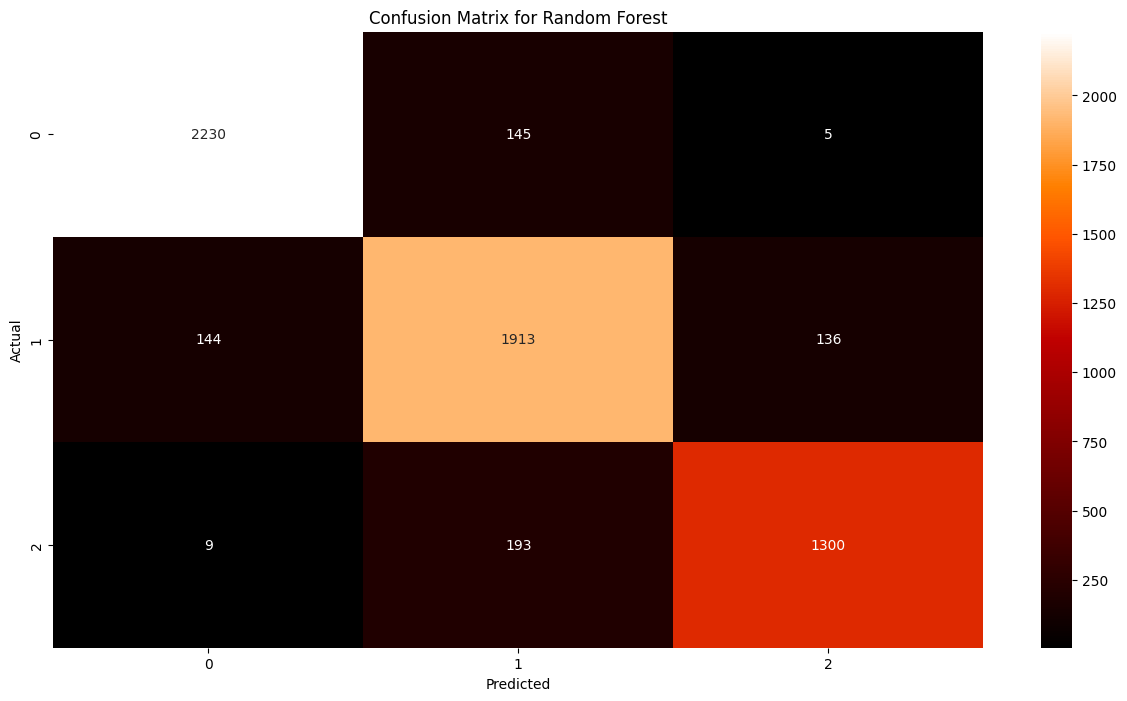

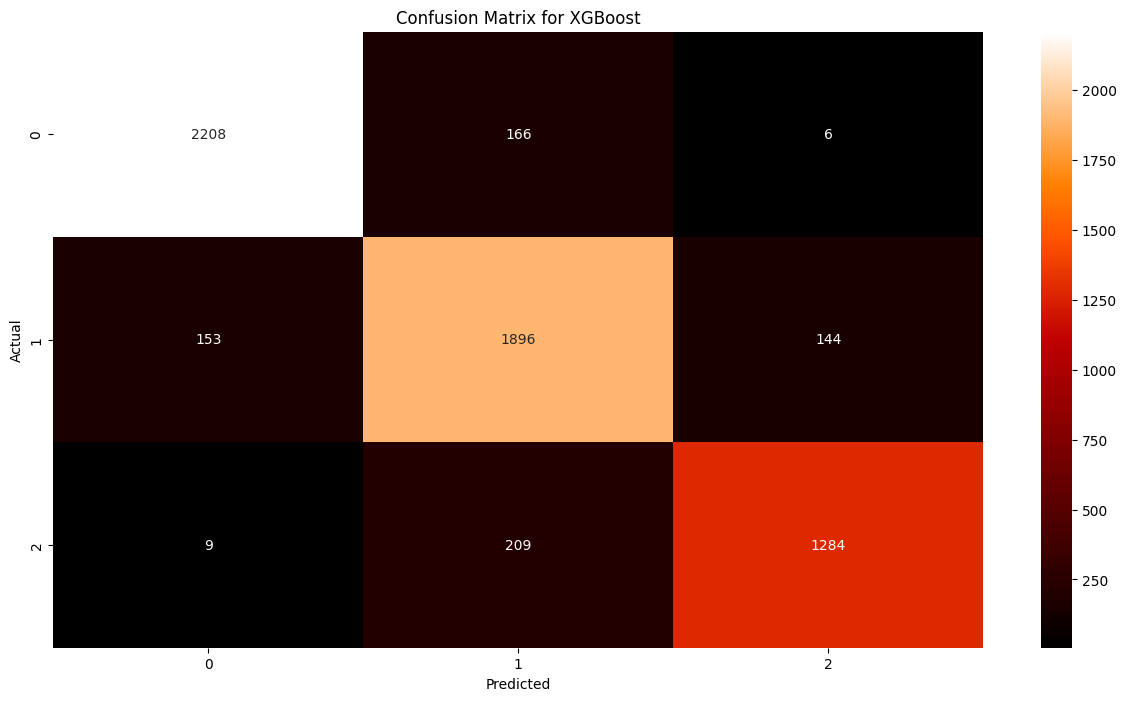

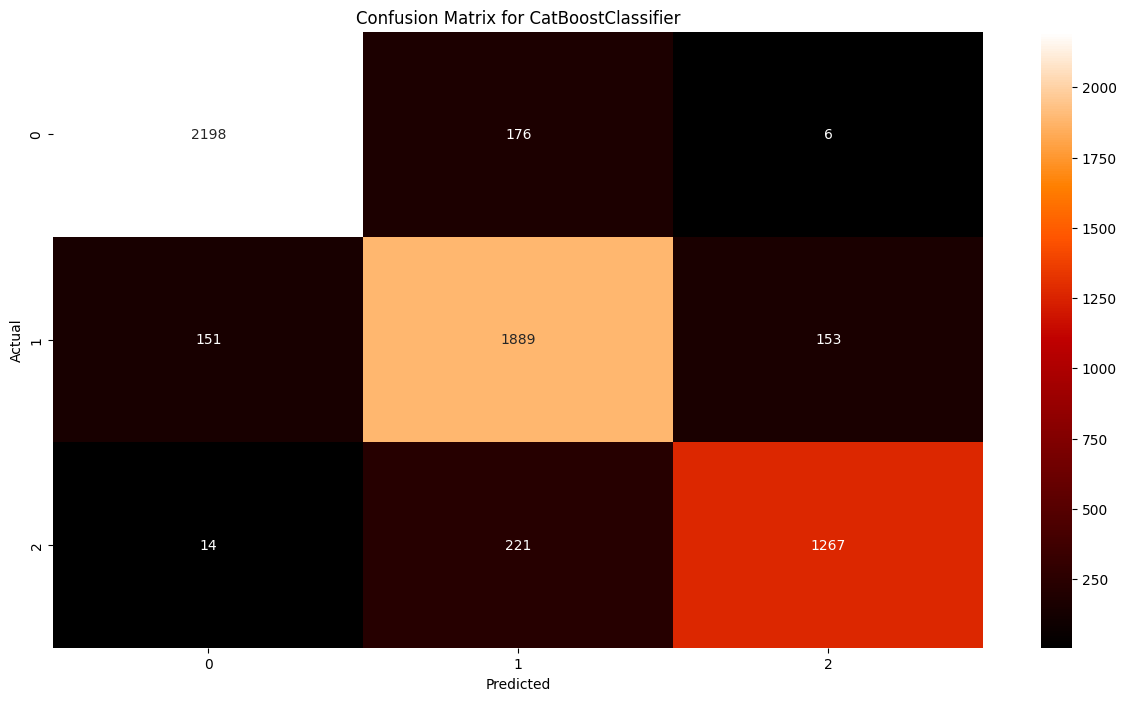

190/190 [==============================] - 1s 4ms/step


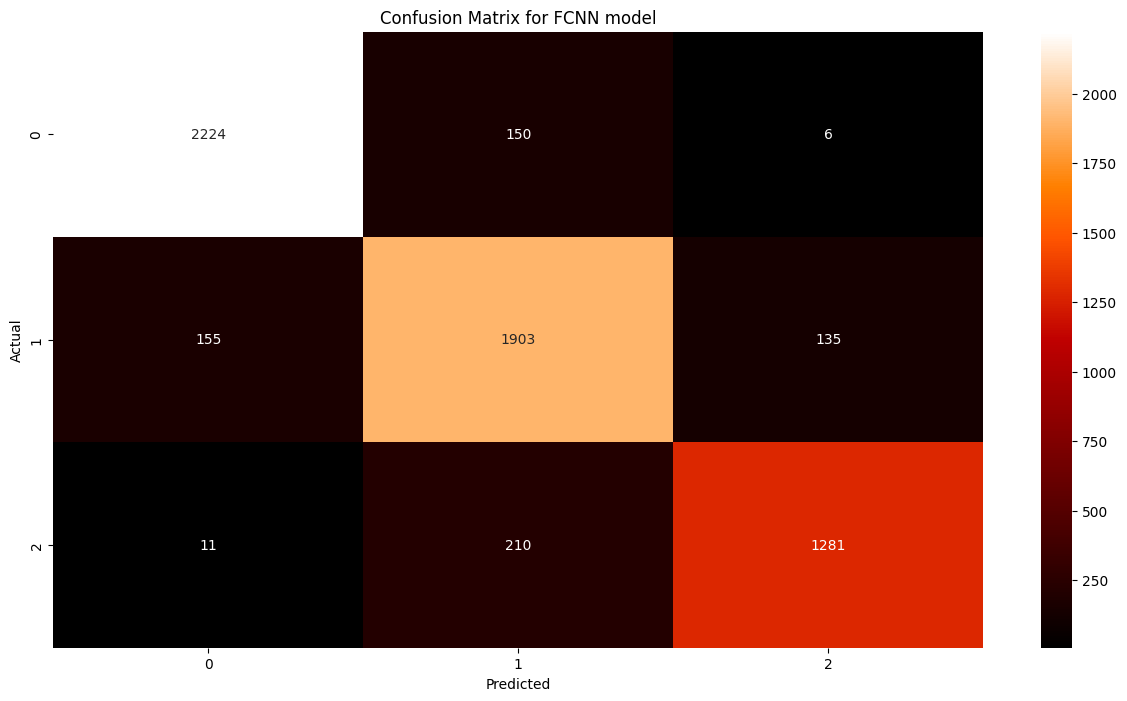

In [15]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Random Forest
y_true = np.array(y_test)
y_pred = np.array(model_RF.predict(x_test))
cm_rf = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (15,8))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Confusion matrix for XGBoost
y_pred_xgb = np.array(model_XGB.predict(x_test))
cm_xgb = confusion_matrix(y_true, y_pred_xgb)
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost")
plt.show()

# Confusion matrix for CatBoostClassifier
y_pred_cb = np.array(model_CB.predict(x_test))
cm_cb = confusion_matrix(y_true, y_pred_cb)
plt.figure(figsize = (15,8))
sns.heatmap(cm_cb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for CatBoostClassifier")
plt.show()

# Confusion matrix for CNN model
y_pred_cnn = np.argmax(model_cnn.predict(x_test), axis=-1)
cm_cnn = confusion_matrix(y_true, y_pred_cnn)
plt.figure(figsize = (15,8))
sns.heatmap(cm_cnn, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for FCNN model")
plt.show()


In [ ]:
model_cnn.save('cnn_model.h5')
